# Simple Ising model example

We start by defining a graph, and simulating a temperature range

In [1]:
import networkx as nx
from Toolbox import infcy # montecarlo methods
from Models import fastIsing # models

import numpy as np
graph = nx.barabasi_albert_graph(10, 4)
model = fastIsing.Ising(graph)


In [2]:
# match magnetization over temp range
temps        = np.linspace(0, 5, 100)
nSamples     = int(1e4)

model.magSide    = '' # equal magnetization sampling
model.updateType = 'single'


mag, sus = model.matchMagnetization(temps, nSamples)
sus[np.isfinite(sus) == 0] = 0 # remove nans
idx     = np.argsort(sus)[-2] # get 'max' idx ; second is used
model.T = temps[idx]


  0%|          | 0/100 [00:00<?, ?it/s]/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
 17%|█▋        | 17/100 [00:00<00:00, 169.64it/s]

Computing mag per t


100%|██████████| 100/100 [00:00<00:00, 201.74it/s]


In [3]:
deltas        = 10         #conditional time steps
nSamples      = 100        # max number of states
step          = int(1e3)   
burninSamples = 100        # burninSamples + step = sim. steps until sample
repeats       = int(1e3)   # number of conditional repeats


snapshots   = infcy.getSnapShots(model, nSamples, step, burninSamples)
cpx, px, mi = infcy.runMC(model, snapshots, deltas, repeats) # wrapper

100%|██████████| 5/5 [00:00<00:00, 268.27it/s]

done
Found 5 states
Delta =  0.03 sec
Decoding..
starting runs
Delta =  0.03 sec



/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log2
  if __name__ == '__main__':
/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


# Plotting

# The graph


/home/casper/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


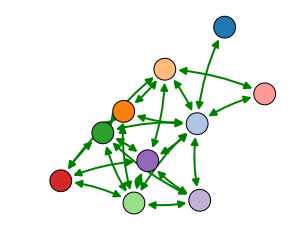

In [9]:
from matplotlib.pyplot import *
from Utils import plotting as plotz # plotting toolbox
positions   = {}
for node, pos in  nx.nx_agraph.graphviz_layout(model.graph, prog = 'neato').items():
    positions[node] =  np.array(pos) * .1

fig, ax = subplots()
p = dict(layout = dict(scale = 1),\
         circle = dict(\
                     radius = 1),\
         annotate = dict(fontsize = 10)
         )
plotz.addGraphPretty(model, ax,  positions, **p)
ax.axis('off')
fig.show()


## Magnetization and susceptibilty
Let's draw some plots. First we start with the magnetization as function of temperature. Additionally, we plot the susceptibility. 


/home/casper/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


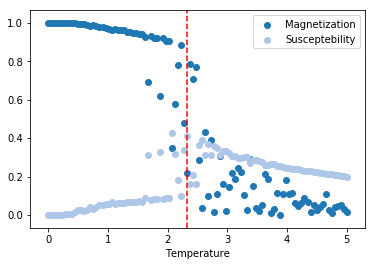

In [10]:
# show mag and sus as function of temperature
fig, ax = subplots()
ax.scatter(temps, mag, label = 'Magnetization')
ax.scatter(temps, sus, label = 'Susceptebility')
ax.axvline(temps[idx], color = 'red', linestyle = 'dashed')
ax.set(xlabel = 'Temperature')
ax.legend()
fig.show()

# Mutual information decay


/home/casper/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


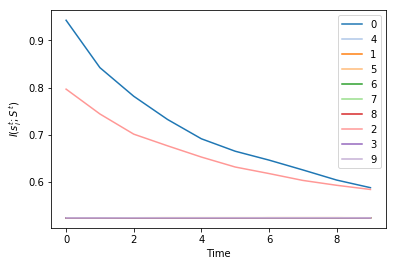

In [11]:
# show mi
colors = cm.tab20(np.arange(model.nNodes)) # colors per node
rcParams['axes.prop_cycle'] = cycler('color', colors)

fig, ax = subplots()
for node in range(model.nNodes):
    ax.plot(mi[:, node], color = colors[node], label = model.rmapping[node])
ax.set(xlabel = 'Time', ylabel = '$I(s_i^t ; S^t)$')
ax.legend()
fig.show()